# Układy równań liniowych
# oraz różne sposoby ich rozwiązywania

## Przykładowy układ równań i sposób jego przedstawienia za pomocą macierzy
Taki układ równań:
$$
    \begin{cases}
        2.3x_1 - 3.4x_2 + 0.66x_3 = 13.1 \\ \\
        -0.23x_1 + 6.2x_2 + 12.2x_3 = 2.0 \\ \\
        22.12x_1 + 3.33x_2 - 7.89x_3 = -23.12
    \end{cases}
$$
można zapisać za pomocą macierzy w ten sposób:
$$
    \begin{gather}
        \begin{bmatrix}
            2.3 & -3.4 & 0.66 \\
            -0.23 & 6.2 & 12.2 \\
            22.12 & 3.33 & -7.89
        \end{bmatrix}
        *
        \begin{bmatrix}
            x_1 \\
            x_2 \\
            x_3
        \end{bmatrix}
        =
        \begin{bmatrix}
            13.1 \\
            2.0 \\
            -23.12
        \end{bmatrix}
    \end{gather}
$$
gdzie kolejno $ \bold{A} $ to macierz podstawowa (główna) układu, $ \bold{x} $ to wektor niewiadomych oraz $ \bold{b} $ to wektor wyrazów wolnych. Ogólnie równanie macierzowe przedstawiamy więc, w następujący sposób:

$$ \bold{A} * \bold{x} = \bold{b} $$

Spotkać się też można z macierzą zawierającą wyrazy wolne, należy to traktować jak wiele układów równań, gdzie każdy składa się z takich samych współczynników oraz dla każdego układu przypisujemy kolejne kolumny macierzy wyrazów wolnych.

## Analiza sposobów rozwiązywania układów macierzowych

### Dane testowe
Jako dane testowe przyjmujemy macierz pasmową. Macierz pasmowa (wstęgowa) to kwadratowa macierz rzadka, której wszystkie elementy są zerowe poza diagonalą i pasmem (wstęgą) wokół niej. Mając daną macierz $ {\displaystyle n\times n,}$ jej elementy $ {\displaystyle a_{i,j}} $ są niezerowe, gdy ${\displaystyle i-k_{1}\leqslant j\leqslant i+k_{2},}$ gdzie ${\displaystyle k_{1,2}\geqslant 0}$ określają tzw. szerokość pasma. Jednak aby uprościć obliczenia będziemy operować na macierzach w formacie pełnym.

Nasza macierz główna będzie wymiaru $934 \times 934, k_1 = k_2 = 2$ oraz będzie zawierać następujące elementy:

$$
\[
  \bold{A} =
  \left[ {\begin{array}{cccc}
    14 & -1 & -1 & 0 & 0 & 0 & 0 & \cdots & 0 \\
    -1 & 14 & -1 & -1 & 0 & 0 & 0 & \cdots & 0 \\
    -1 & -1 & 14 & -1 & -1 & 0 & 0 & \cdots & 0 \\
    0 & -1 & -1 & 14 & -1 & -1 & 0 & \cdots & 0 \\
    \vdots &  & \ddots & \ddots & \ddots & \ddots & \ddots &  & \vdots \\
    0 & \cdots & 0 & -1 & -1 & 14 & -1 & -1 & 0 \\
    0 & \cdots & 0 & 0 & -1 & -1 & 14 & -1 & -1 \\
    0 & \cdots & 0 & 0 & 0 & -1 & -1 & 14 & -1 \\
    0 & \cdots & 0 & 0 & 0 & 0 & -1 & -1 & 14 \\
  \end{array} } \right]
\]
$$

wektor wyrazów wolnych:

$$
\[
  \bold{b} =
  \left[ {\begin{array}{cccc}
    sin(0) \\
    sin(5) \\
    sin(10) \\
    \vdots \\
    sin(525) \\
    sin(530) \\
    sin(535)
  \end{array} } \right]
\]
$$


In [8]:
from math import sin
from matrix import Matrix


def generate_test_data(size: int, a_1: float, a_2: float, a_3: float, f_4: int):
    a = Matrix(size)
    rows, cols = a.get_size()
    for i in range(rows):
        for j in range(cols):
            if i == j:
                a.set_at(i, j, a_1)

            else:
                distance = abs(i - j)
                if distance == 1:
                    a.set_at(i, j, a_2)

                if distance == 2:
                    a.set_at(i, j, a_3)

    b = Matrix(n, m=1)
    for i in range(b.get_size()[0]):
        b.set_at(i, value=sin(i * (f_4 + 1)))

    return a, b


my_index = "184934"
n = int("9" + my_index[len(my_index) - 2] + my_index[len(my_index) - 1])
a1 = 5 + float(my_index[3])
a2 = a3 = -1.0
f = int(my_index[2])
matrix_a, vector_b = generate_test_data(n, a1, a2, a3, f)

### Metody iteracyjne
Jako pierwsze testować będziemy metody iteracyjne, a konkretnie metodę Jacobiego oraz metodą Gaussa-Seidla. Metody iteracyjne to metody, które nie uzyskują dokładnego rozwiązania, a tylko jego przybliżenie, w zamian za szybkość działania.

Bardzo ważne dla algorytmów iteracyjnych jest określenie, w jakim momencie osiągneliśmy satysfakcjonujące przybliżenie rozwiązania. W tym celu skorzystamy z tzw. *wektora residuum*, który dla *k*-tej iteracji przyjmuje postać:

$$
    \bold{res^{(k)}} = \bold{A}\bold{x}^{(k)} - \bold{b}
$$

Wielkość błędu natomiast jesteśmy w stanie zbadać określając jego normę euklidesową.

$$
    ||\bold{e}||_2 = \sqrt{\sum_{j=1}^{n}e_j^2}
$$

In [2]:
from math import sqrt


def euclidean_norm(vec: Matrix):
    return sqrt(sum([vec.get_at(i) ** 2 for i in range(vec.get_size()[0])]))


print(euclidean_norm(vector_b))

21.598539852267848


#### Metoda Jacobiego
Metoda Jacobiego to jedna z metod iteracyjnych. Do wyliczenia kolejnych wektorów przybliżeń, używany jest wektor z poprzedniej iteracji. Mimo, że część obecnego wektora jest już wyliczona.

Pierwszym krokiem jest rozbicie macierzy systemowej na trzy macierze: $ \bold{A} = -\bold{L} -\bold{U} + \bold{D} $, gdzie kolejno macierz $ \bold{L} $ to macierz trójkątna dolna, zawierająca liczby przeciwne **poniżej** głównej diagonali macierzy $ \bold{A} $, macierz $ \bold{U} $ to macierz trójkątna górna, zawierająca liczby przeciwne **powyżej** głównej diagonali macierzy $ \bold{A} $, macierz $ \bold{D} $ to macierz diagonalna, zawierająca liczby z głównej diagonali macierzy $ \bold{A} $.

Przekształcając równanie $ \bold{A}*\bold{x}=\bold{b} $, wykorzystując powyższą równość otrzymujemy:
$$
    (-\bold{L} - \bold{U} + \bold{D})\bold{x} = \bold{b}
$$
po serii przekształceń:
$$
    \bold{D}\bold{x} = (\bold{L} + \bold{U})\bold{x} + \bold{b} \\
    \bold{x} = \bold{D}^{-1}(\bold{L} + \bold{U})\bold{x} + \bold{D}^{-1}\bold{b} \\
$$
otrzymujemy ostateczny wzór:
$$
    \tilde{\bold{x}}^{(n+1)} = \bold{D}^{-1}(\bold{L} + \bold{U})\tilde{\bold{x}}^{(n)} + \bold{D}^{-1}\bold{b}
$$
gdzie $ (n) $ oznacza n-tą iteracje.

Metoda ta wykorzystuje szybkie obliczeniowo rozwiązywanie układów równań zapisanych za pomocą macierzy **diagonalnych**, opisane takim wzorem:
$$
    x_i = \frac{b_i}{a_{ii}}
$$
gdzie $ i $ to kolejne indeksy rzędów.

In [3]:
import time
from math import isinf
from matrix import diagonal_solver


def jacobi(a: Matrix, b: Matrix, epsilon: float):
    r = Matrix(a.get_size()[0], m=1, value=1.0)
    it = 0

    u = -a.tri_u(1)
    l = -a.tri_l(1)
    d = a.diag()

    const_1 = diagonal_solver(d, l + u)
    const_2 = diagonal_solver(d, b)
    
    residuum_norm_list = []
    while True:
        it += 1
        r = const_1 * r + const_2

        residuum = a * r - b
        norm = euclidean_norm(residuum)
        residuum_norm_list.append(norm)
        if norm <= epsilon or isinf(norm):
            break
    return it, residuum_norm_list, r

#### Metoda Gaussa-Seidla
Metoda Gaussa-Seidla to kolejna metoda iteracyjna, bardzo podobna to poprzednio opisanej. Jednak zamiast używać wektora przybliżenia z poprzedniej iteracji używamy najnowszych danych.

Również stosujemy podział na trzy macierze $ \bold{L}, \bold{U}, \bold{D} $. Przekształcenia nieco się różnią:
$$
    (-\bold{L} - \bold{U} + \bold{D})\bold{x} = \bold{b} \\
    (\bold{D} - \bold{L})\bold{x} = \bold{U}\bold{x} + \bold{b} \\
    \bold{x} = (\bold{D} - \bold{L})^{-1}(\bold{U}\bold{x}) + (\bold{D} - \bold{L})^{-1}\bold{b} \\
    \tilde{\bold{x}}^{(n+1)} = (\bold{D} - \bold{L})^{-1}(\bold{U}\tilde{\bold{x}}^{(n)}) + (\bold{D} - \bold{L})^{-1}\bold{b}
$$
gdzie $ (n) $ oznacza n-tą iteracje.

Tym razem przy rozwiązywaniu układów równań, mamy do czynienia z macierzami trójkątnymi dolnymi. Rozwiązanie ich również jest szybkie obliczeniowo. Wykorzystamy do tego algorytm o nazmie: **Forward Substitution**.

Mając taki układ równań:
$$
\[
  \left[ {\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mm} \\
  \end{array} } \right]
\]
\[
  \left[ {\begin{array}{cccc}
    x_1 \\
    \vdots \\
    x_{m-1} \\
    x_m
  \end{array} } \right]
\]
=
\[
  \left[ {\begin{array}{cccc}
    b_1 \\
    \vdots \\
    b_{m-1} \\
    b_m
  \end{array} } \right]
\]
$$

Możemy go rozwiązać korzystając z takiego wzoru:
$$
x_1 = \frac{b_1}{a_{11}} \\
x_2 = \frac{b_2 - a_{21}x_1}{a_{22}} \\
x_3 = \frac{b_3 - a_{31}x_1 - a_{32}x_2}{a_{33}} \\
\vdots \\
x_m = \frac{b_m - \sum_{i=1}^{m-1}a_{mi}x_i}{a_{mm}}
$$

In [4]:
from matrix import forward_substitution_solver


def gauss_seidel(a: Matrix, b: Matrix, epsilon: float):
    r = Matrix(a.get_size()[0], m=1, value=1.0)
    it = 0

    u = -a.tri_u(1)
    l = -a.tri_l(1)
    d = a.diag()

    const_1 = d - l
    const_2 = forward_substitution_solver(const_1, b)
    
    residuum_norm_list = []
    while True:
        it += 1
        r = forward_substitution_solver(const_1, u * r) + const_2

        residuum = a * r - b
        norm = euclidean_norm(residuum)
        residuum_norm_list.append(norm)
        if norm <= epsilon or isinf(norm):
            break
    return it, residuum_norm_list, r

#### Porównanie metod


In [11]:
eps = 1e-9
start_time = time.time()
jacobi_iterations, jacobi_norm, _ = jacobi(matrix_a, vector_b, eps)
jacobi_time = time.time() - start_time
print("Jacobi:")
print("Time:", "%.2f" % jacobi_time + "s")
print("Iterations:", jacobi_iterations, "\n")

start_time = time.time()
gauss_iterations, gauss_norm, _ = gauss_seidel(matrix_a, vector_b, eps)
gauss_time = time.time() - start_time
print("Gauss-Seidel:")
print("Time:", "%.2f" % gauss_time + "s")
print("Iterations:", gauss_iterations, "\n")

delta = abs(jacobi_time - gauss_time)
if gauss_time < jacobi_time:
    print("Gauss-Seidel method was faster by:", "%.2f" % delta + "s")
else:
    print("Jacobi method was faster by:", "%.2f" % delta + "s")

Jacobi:
Time: 13.95s
Iterations: 22 

Gauss-Seidel:
Time: 15.52s
Iterations: 15 

Jacobi method was faster by: 1.57s


Metoda Jacobiego potrzebowała mniej czasu, ale za to więcej iteracji, niż metoda Gaussa-Seidla w jakiej otrzymaliśmy wymagane przybliżenie. Z tych obserwacji możemy stwierdzić, że metoda Gaussa-Seidla zwraca w kolejnych iteracjach dokładniejsze przybliżenia, lecz zajmuje jej to nieco więcej czasu.

Jednak metody iteracyjne nie są idealne. Otrzymaliśmy poprawne wyniki, ponieważ dobraliśmy dane testowe do metod. Zobaczmy co się stanie, gdy dobierzemy nieco inne dane testowe.

In [12]:
matrix_a, vector_b = generate_test_data(n, 3., -1., -1., f)

jacobi_iterations_2, jacobi_norm_2, _ = jacobi(matrix_a, vector_b, eps)
gauss_iterations_2, gauss_norm_2, _ = gauss_seidel(matrix_a, vector_b, eps)

#### Warunki zbieżności metod iteracyjnych
Korzystając z metod iteracyjnych musimy się liczyć z tym, że nie zawsze otrzymamy przybliżenie. Warto przed korzystaniem z danej metody sprawdzić jej **warunki zbieżności**.
Jednym z warunków obu powyższych metod jest to, aby macierz główna była **diagonalnie dominująca**, czyli taka, dla których suma modułów liczb w danym rzędzie, poza liczbami na diagonali, jest mniejsza od modułu wartości na diagonali.
$$
    |a_{ii}| > \sum_{}^{}_{i\ne{j}}|a_{ij}|
$$
Łatwo, więc policzyć dla pierwszej macierzy testowej A, warunek ten był spełniony, ponieważ $ 14 > 4 $.
W drugim przypadku warunek ten nie jest spełniony $ 3 < 4 $.
Zobaczmy jak to wygląda na wykresach.

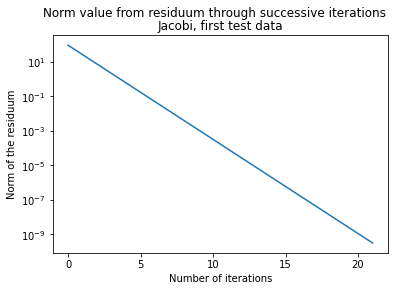

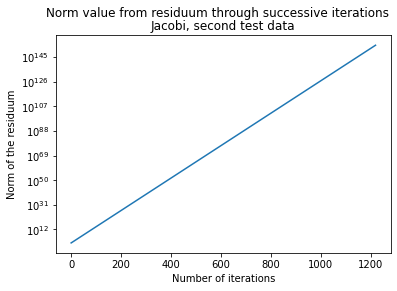

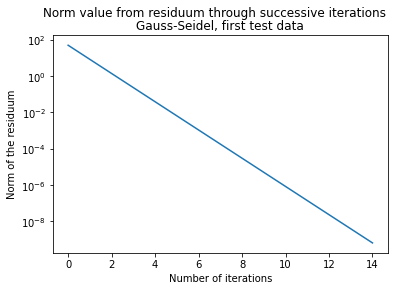

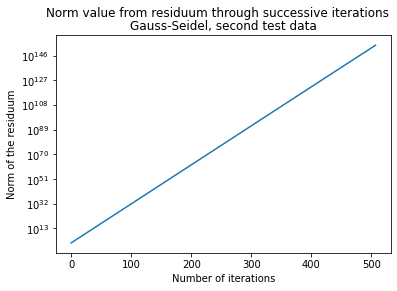

In [34]:
from matplotlib import pyplot as plt

plt.figure(1)
plt.semilogy([i for i in range(jacobi_iterations)], jacobi_norm)
plt.suptitle("Norm value from residuum through successive iterations")
plt.title("Jacobi, first test data")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residuum")

plt.figure(2)
plt.semilogy([i for i in range(jacobi_iterations_2)], jacobi_norm_2)
plt.suptitle("Norm value from residuum through successive iterations")
plt.title("Jacobi, second test data")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residuum")

plt.figure(3)
plt.semilogy([i for i in range(gauss_iterations)], gauss_norm)
plt.suptitle("Norm value from residuum through successive iterations")
plt.title("Gauss-Seidel, first test data")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residuum")

plt.figure(4)
plt.semilogy([i for i in range(gauss_iterations_2)], gauss_norm_2)
plt.suptitle("Norm value from residuum through successive iterations")
plt.title("Gauss-Seidel, second test data")
plt.xlabel("Number of iterations")
plt.ylabel("Norm of the residuum")

plt.show()

Na powyższych wykresach widać dokładnie, jak ważny jest dobór metody rozwiązania układu.

### Metody bezpośrednie

## Źródła
    1. https://en.wikipedia.org/wiki/Band_matrix
    2. https://en.wikipedia.org/wiki/Jacobi_method
    3. https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method
    4. https://www.gaussianwaves.com/2013/05/solving-a-triangular-matrix-using-forward-backward-substitution/